# Project: `Student Academic Performance`

**Group:** `SIC 702` `P1 G13`  
**Team Members:** `Abdelrahman Alaa`, `Kareem Reda`, `Nouran Ashraf`  
**Facilitator:** `Salma`

---

## Project Overview
This project aims to analyze student performance and identify the factors that most influence their academic outcomes.  
The workflow covers the full data analysis pipeline, including **Exploratory Data Analysis (EDA)**, **data preprocessing**, **feature engineering**, **dashboard visualization**, and answering **business questions**.  

By leveraging Python libraries such as **Pandas** for data cleaning and transformation, and **Matplotlib/Seaborn** for visualization, we extract insights from the dataset.  
The analysis includes descriptive statistics and graphical exploration to highlight relationships between variables such as **gender, race/ethnicity, parental education, lunch type, and test preparation courses** with student scores in **math, reading, and writing**.  

The ultimate goal is to uncover **actionable insights** that can guide **educators, parents, and institutions** in improving student performance and supporting better educational strategies.

**Kaggle Dataset Link:** [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

---

## Dataset Columns

| Column Name                  | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| `gender`                      | The student's gender (male/female).                                         |
| `race/ethnicity`              | The student's racial/ethnic group (e.g., group A, B, C, etc.).             |
| `parental level of education` | The highest education level achieved by the student's parents.              |
| `lunch`                       | Type of lunch received (standard or free/reduced).                          |
| `test preparation course`     | Indicates if the student completed a test preparation course (none/completed). |
| `math score`                  | Score achieved in the mathematics exam (0-100).                             |
| `reading score`               | Score achieved in the reading exam (0-100).                                 |
| `writing score`               | Score achieved in the writing exam (0-100).                                 |

## Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Data/row/StudentsPerformance.xls")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploraty Data Analysis

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Insights Summary

- **Gender:** Slightly more females (518) than males in the dataset.  
- **Race/Ethnicity:** Most students belong to **group C** (319).  
- **Parental Level of Education:** The most common is **some college** (226).  
- **Lunch Type:** Majority have **standard lunch** (645).  
- **Test Preparation Course:** Most students did **not complete** a test preparation course (642).  

#### Numerical Scores
- **Math Score:**  
  - Mean: 66.09, Std: 15.16  
  - Range: 0 – 100  
  - Median: 66, Q1: 57, Q3: 77  

- **Reading Score:**  
  - Mean: 69.17, Std: 14.60  
  - Range: 17 – 100  
  - Median: 70, Q1: 59, Q3: 79  

- **Writing Score:**  
  - Mean: 68.05, Std: 15.20  
  - Range: 10 – 100  
  - Median: 69, Q1: 57.75, Q3: 79  

**Key Observations:**  
- Scores are fairly consistent across subjects with averages around 66–69.  
- Some low scores indicate presence of outliers (e.g., math min=0, writing min=10).  
- Majority of students did not take the test preparation course, which could affect performance.  
- Standard lunch is more common, which might correlate with better performance than free/reduced lunch.  

In [6]:
for col in df.columns:
    print(df[col].value_counts())
    print('Number of unique values: ',df[col].nunique())
    print('-'*50)

gender
female    518
male      482
Name: count, dtype: int64
Number of unique values:  2
--------------------------------------------------
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Number of unique values:  5
--------------------------------------------------
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Number of unique values:  6
--------------------------------------------------
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Number of unique values:  2
--------------------------------------------------
test preparation course
none         642
completed    358
Name: count, dtype: int64
Number of unique values:  2
--------------------------------------------------
math score
65    36
62    35
69    32
59    32
61    27
      

---
---

## Data Preprocessing

In [7]:
df.isna().sum().sum()

0

In [8]:
df.duplicated().sum()

0

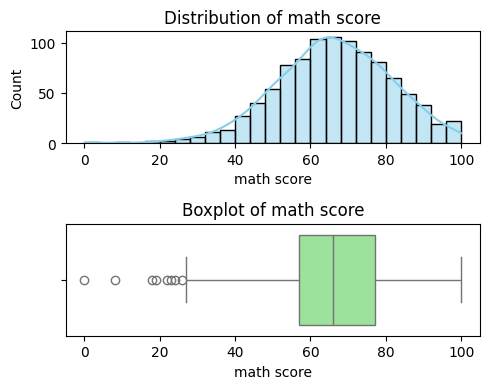

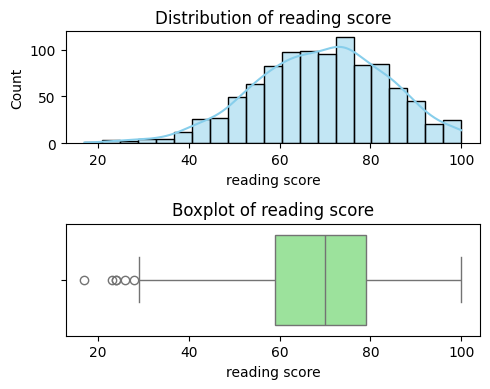

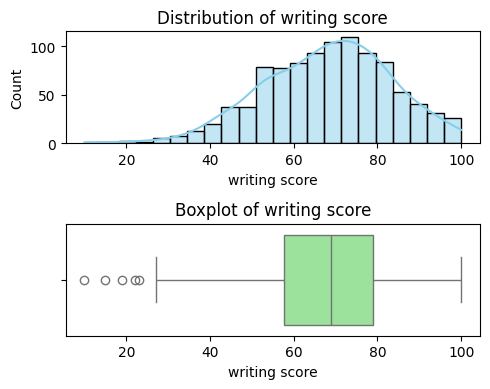

In [9]:
numerical_cols = ['math score','reading score','writing score']

for col in numerical_cols:
    fig, axes = plt.subplots(2, 1, figsize=(5,4))
    # histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [10]:
# Removing Outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df.reset_index(drop=True, inplace=True)

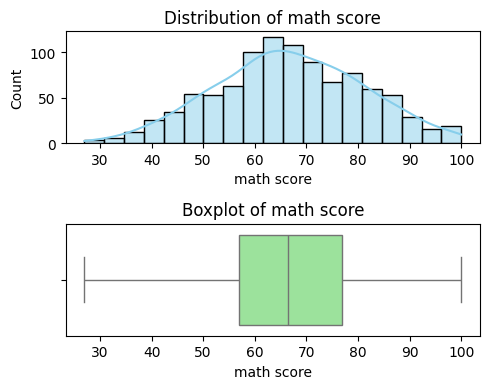

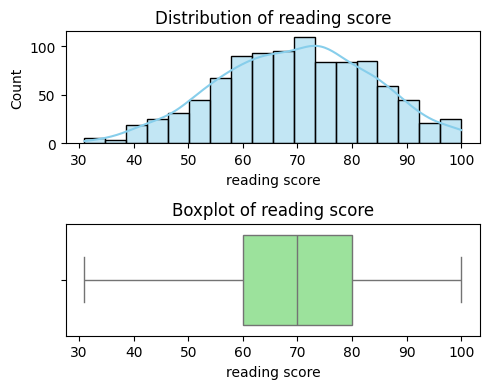

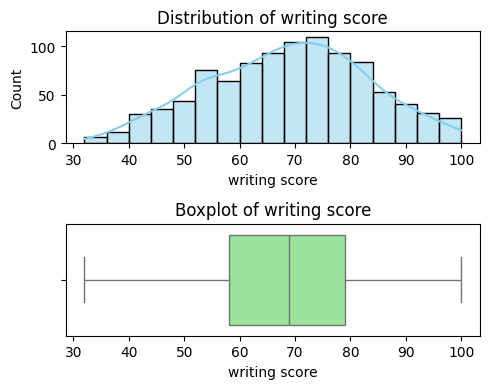

In [11]:
numerical_cols = ['math score','reading score','writing score']

for col in numerical_cols:
    fig, axes = plt.subplots(2, 1, figsize=(5,4))
    # histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

---
---

## Dashboard
- A visual summary of the dataset to understand distributions, categorical breakdowns, and score patterns before diving into detailed analysis.

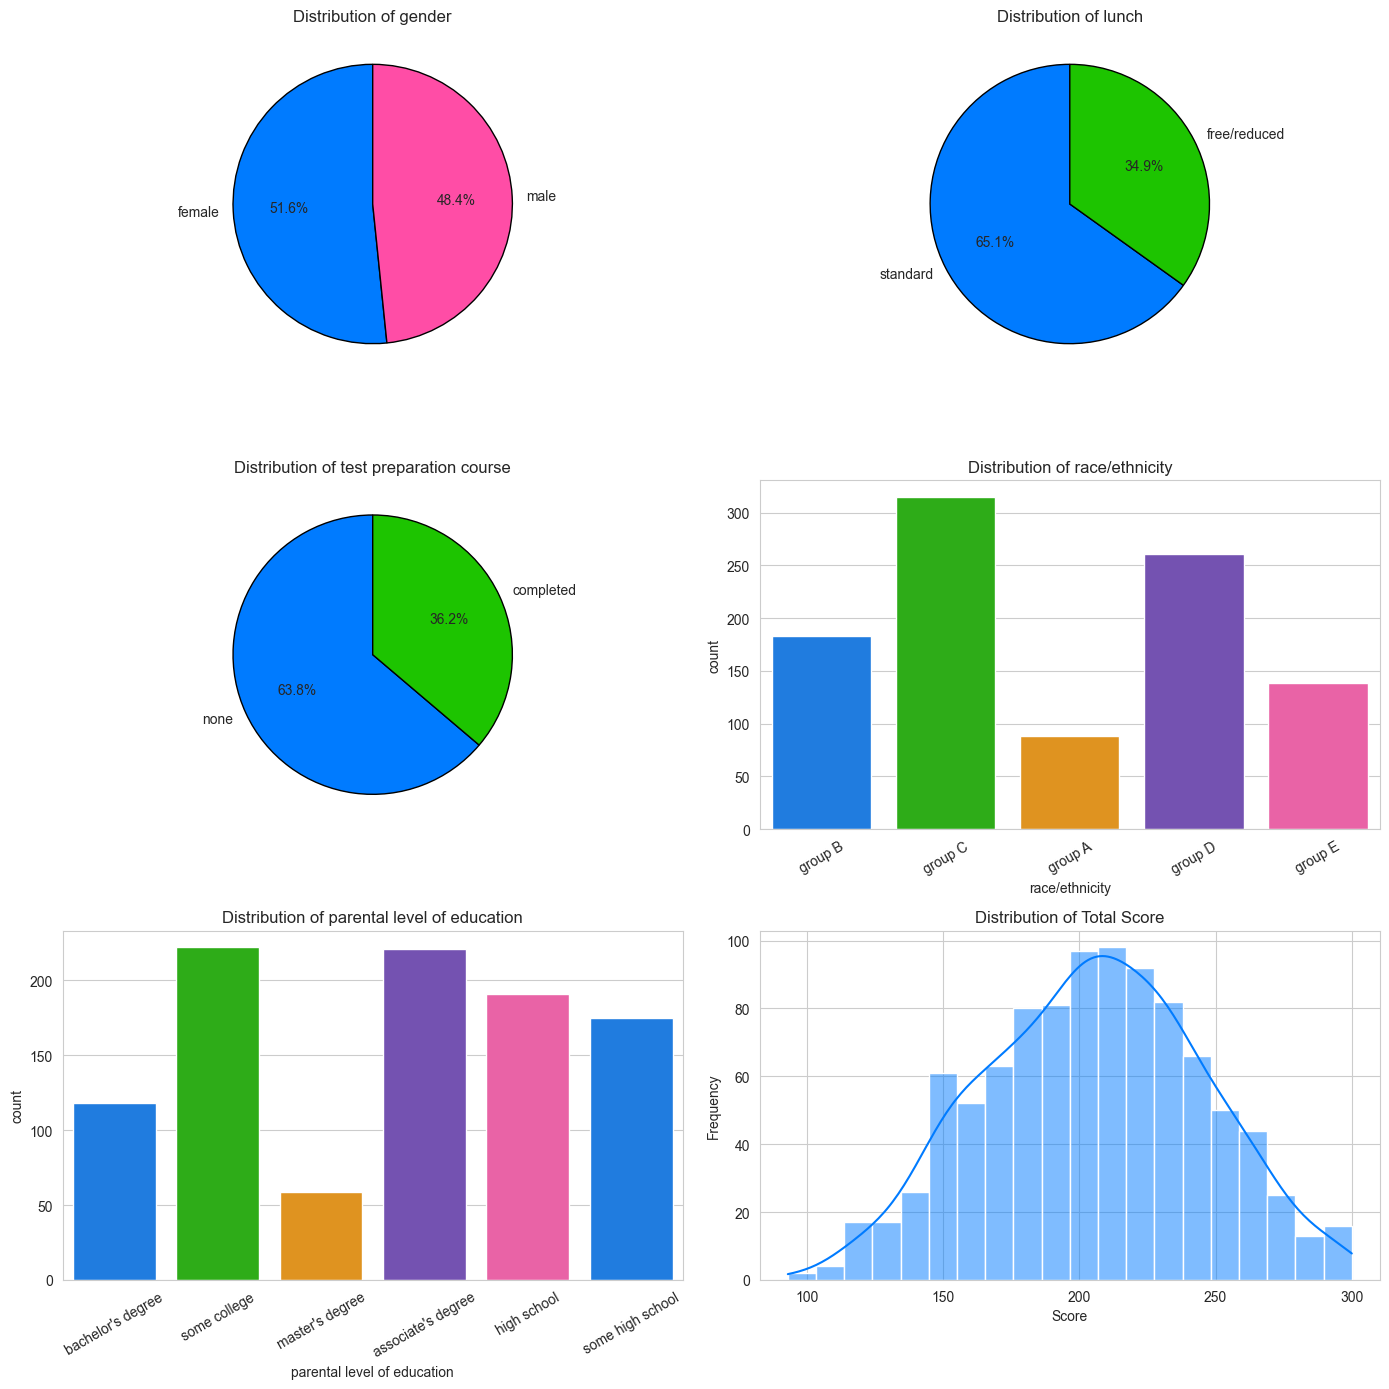

In [12]:
# Set style
sns.set_style("whitegrid")
colors = ["#007bff", "#1dc400", "#ff9900", "#6f42c1", "#ff4da6"]

fig, axes = plt.subplots(3, 2, figsize=(14, 14))  # 3 rows × 2 cols dashboard
axes = axes.flatten()

# 1. Pie Charts for small categorical columns
small_cats = ["gender", "lunch", "test preparation course"]
for i, col in enumerate(small_cats):
    if col == "gender":  
        pie_colors = ["#007bff", "#ff4da6"]  # blue & pink
    else:
        pie_colors = colors
    
    df[col].value_counts().plot.pie(
        ax=axes[i],
        autopct="%1.1f%%",
        colors=pie_colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("")

# 2. Bar Charts for bigger categorical columns
big_cats = ["race/ethnicity", "parental level of education"]
for j, col in enumerate(big_cats, start=len(small_cats)):
    sns.countplot(data=df, x=col, palette=colors, ax=axes[j])
    axes[j].set_title(f"Distribution of {col}")
    axes[j].tick_params(axis='x', rotation=30)

# 3. Histogram for Total Score
df["Total_Score"] = df[["math score", "reading score", "writing score"]].sum(axis=1)
sns.histplot(df["Total_Score"], bins=20, kde=True, color="#007bff", ax=axes[-1])
axes[-1].set_title("Distribution of Total Score")
axes[-1].set_xlabel("Score")
axes[-1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

---
---

## Feature Engineering

In [13]:
df["Total_Score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round(2)

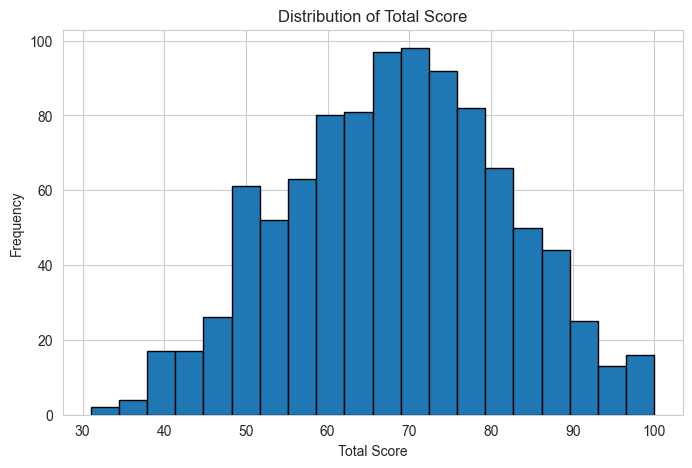

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df["Total_Score"], bins=20, edgecolor="black")
plt.title("Distribution of Total Score")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

In [15]:
df["Performance_Level"] = pd.cut(
    df["Total_Score"],
    bins=[0, 50, 70, 100],
    labels=["Poor", "Average", "Excellent"]
)

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Performance_Level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,Excellent
1,female,group C,some college,standard,completed,69,90,88,82.33,Excellent
2,female,group B,master's degree,standard,none,90,95,93,92.67,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,Poor
4,male,group C,some college,standard,none,76,78,75,76.33,Excellent


In [ ]:
# df.to_csv("../Data/processed/StudentsPerformance_Cleaned_V2.csv")

### Feature Engineering Summary

- **Total_Score**: Created by averaging math, reading, and writing scores, rounded to 2 decimals.  
- **Distribution Plot**: Visualized the distribution of Total_Score using a histogram.  
- **Performance_Level**: Categorized students into `Poor`, `Average`, and `Excellent` based on Total_Score ranges.  

---
---

## Data Analysis & Visualization
### **Answering Business Questions**

### 1. **Performance by Gender**  
   - Do male and female students show significant differences in their Total_Score and Performance_Level?

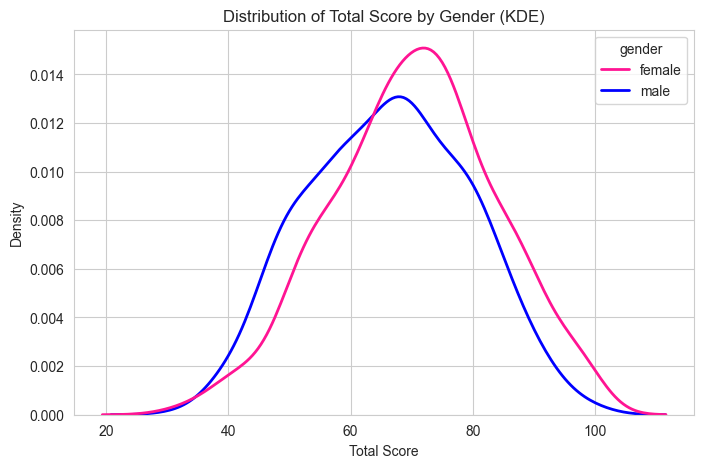

In [18]:
plt.figure(figsize=(8,5))

sns.kdeplot(data=df, x="Total_Score", hue="gender",
            palette={"female":"deeppink", "male":"blue"}, fill=False, linewidth=2)

plt.title("Distribution of Total Score by Gender (KDE)")
plt.xlabel("Total Score")
plt.ylabel("Density")
plt.show()

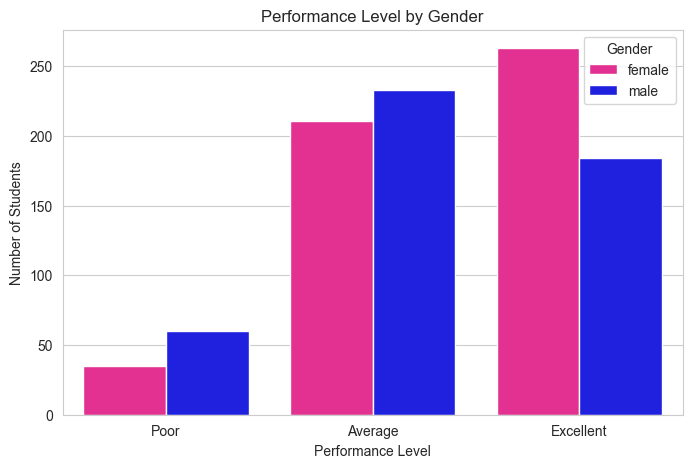

In [19]:
plt.figure(figsize=(8,5))

sns.countplot(data=df, x="Performance_Level", hue="gender",
              palette={"female":"deeppink", "male":"blue"})

plt.title("Performance Level by Gender")
plt.xlabel("Performance Level")
plt.ylabel("Number of Students")
plt.legend(title="Gender")
plt.show()

Since we observed that females tend to have slightly higher total scores than males,  
let’s dive deeper to see **which subjects (Math, Reading, Writing) contribute most to this difference**.

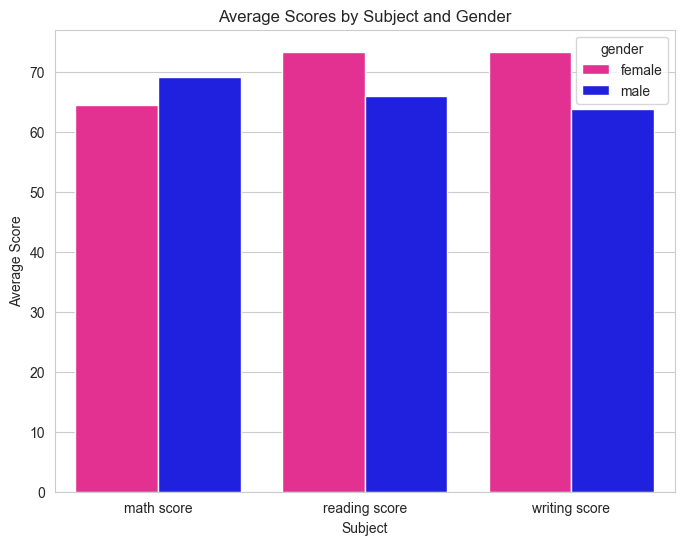

In [20]:
df_melted = df.melt(id_vars="gender", value_vars=["math score", "reading score", "writing score"],
                    var_name="Subject", value_name="Score")

plt.figure(figsize=(8,6))
sns.barplot(
    data=df_melted,
    x="Subject",
    y="Score",
    hue="gender",
    palette={"female": "deeppink", "male": "blue"},
    errorbar=None
)
plt.title("Average Scores by Subject and Gender")
plt.ylabel("Average Score")
plt.show()

From the visualization, we can see that:  
- **Males** perform slightly better in **Math**.  
- **Females** perform noticeably better in **Reading** and **Writing**,  
which explains why their overall distribution is skewed toward higher total scores.

---

### 2. **Performance by Race/Ethnicity**  
   - Do students from different racial/ethnic groups show significant differences in their Total_Score and Performance_Level?

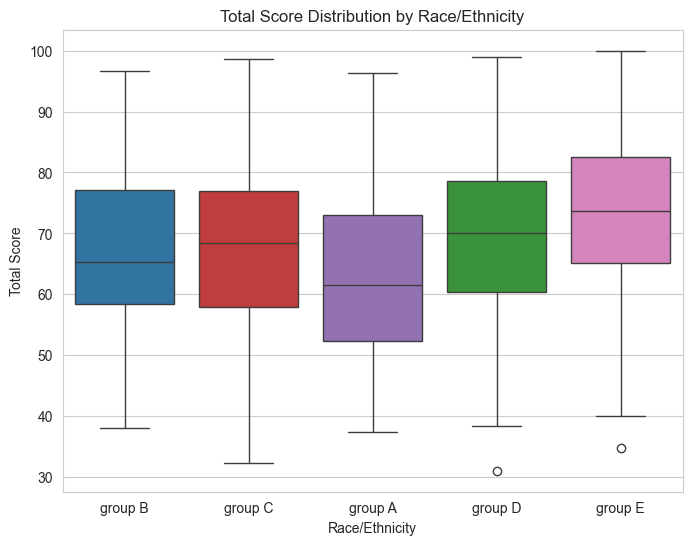

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x="race/ethnicity", y="Total_Score", data=df, palette=["#1f77b4", "#d62728", "#9467bd", "#2ca02c", "#e377c2"])
plt.title("Total Score Distribution by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Total Score")
plt.show()

From the boxplot, we see that:  
- **Group E** shows the **highest median and overall scores**, with relatively high consistency.  
- **Group A** has the **lowest median scores** and wider variability, suggesting weaker performance.  
- Other groups (B, C, D) fall in between, with overlapping distributions.

---

### 3. **Impact of Parental Education**  
   - Does the parental level of education have a significant influence on student performance (Total_Score and Performance_Level)?

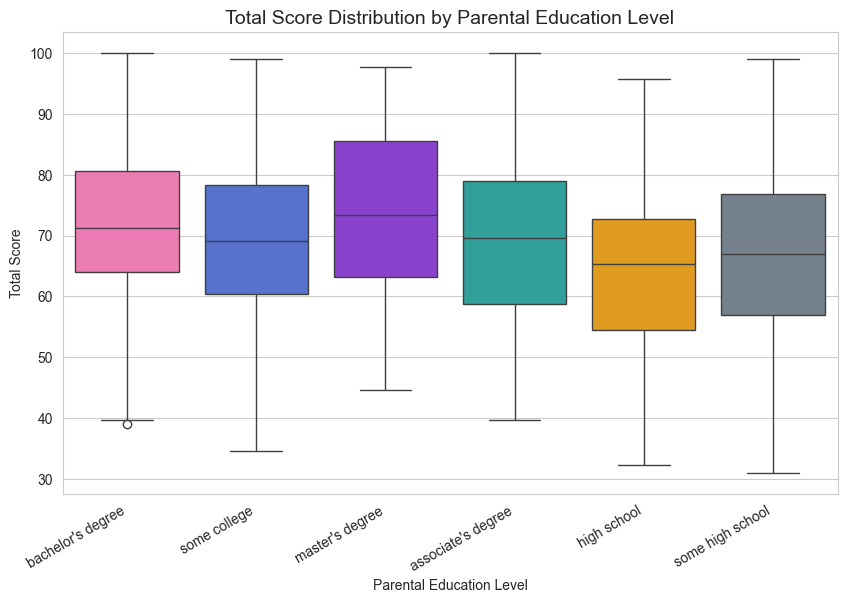

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="parental level of education",
    y="Total_Score",
    data=df,
    palette=["#ff69b4", "#4169e1", "#8a2be2", "#20b2aa", "#ffa500", "#708090"]
)
plt.xticks(rotation=30, ha="right")
plt.title("Total Score Distribution by Parental Education Level", fontsize=14)
plt.ylabel("Total Score")
plt.xlabel("Parental Education Level")
plt.show()

- Students with parents holding a **master’s degree** show the **highest median scores** and stronger overall performance.  
- Those with **high school** or **some high school** education show the **lowest median scores**, with wider variability.  
- Other groups (**associate’s, bachelor’s, some college**) fall in between, with overlapping distributions.  

---

### 4. **Impact of Lunch Type**  
   - Does receiving a free/reduced lunch affect students’ Total_Score and Performance_Level compared to standard lunch?  

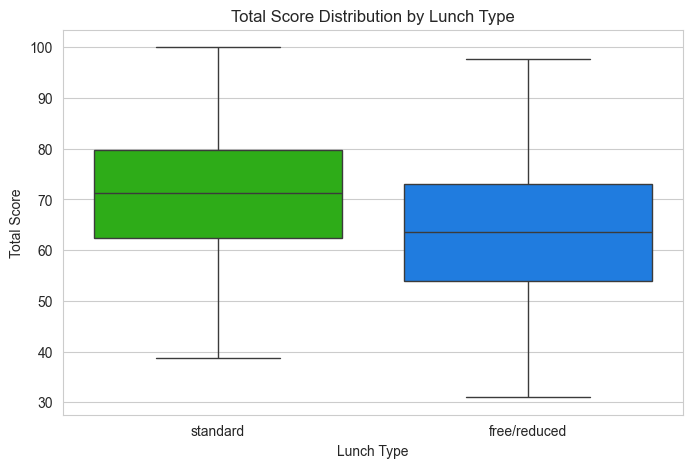

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x="lunch", y="Total_Score", data=df, palette={"standard": "#1dc400", "free/reduced": "#007bff"})
plt.title("Total Score Distribution by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Total Score")
plt.show()

- **Students with Standard lunch** consistently achieve **higher scores** across subjects.  
- **Students with Free/Reduced lunch** show **lower performance**, suggesting a potential link between nutrition and academic achievement.

---

### 5. **Effect of Test Preparation**  
- Does completing the test preparation course improve students' performance in exams?  

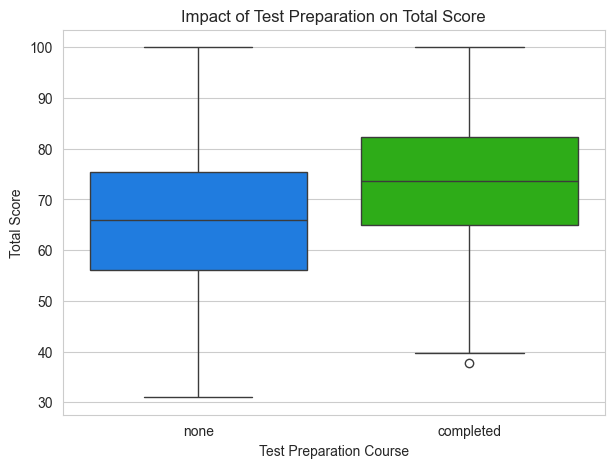

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x="test preparation course",
    y="Total_Score",
    palette={"completed": "#1dc400", "none": "#007bff"}
)
plt.title("Impact of Test Preparation on Total Score")
plt.xlabel("Test Preparation Course")
plt.ylabel("Total Score")
plt.show()

- **Students who completed the test preparation course** achieved **notably higher scores** than those who did not.  
- This highlights the **positive impact of preparation** on overall academic performance.  

---

### 6. **Performance Across Subjects**  
   - Do students perform consistently across Math, Reading, and Writing, or are there notable differences?

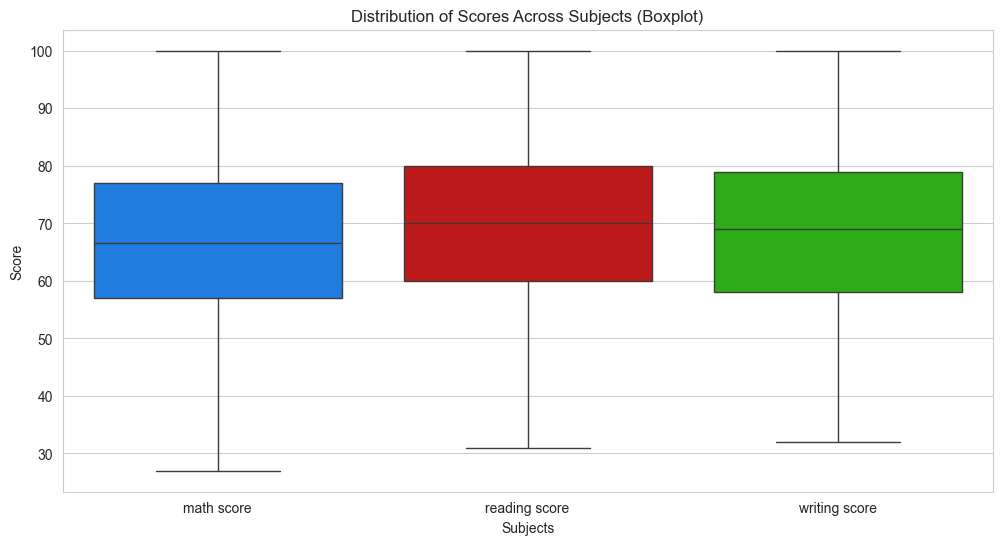

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["math score", "reading score", "writing score"]], palette=["#007bff", "#d80000", "#1dc400"])
plt.title("Distribution of Scores Across Subjects (Boxplot)")
plt.ylabel("Score")
plt.xlabel("Subjects")
plt.show()

- **Reading scores** show a slightly higher distribution compared to Math and Writing. 

---

### 7. **Relationships Between Features**  
   - What are the relationships between numerical variables and encoded categorical variables?

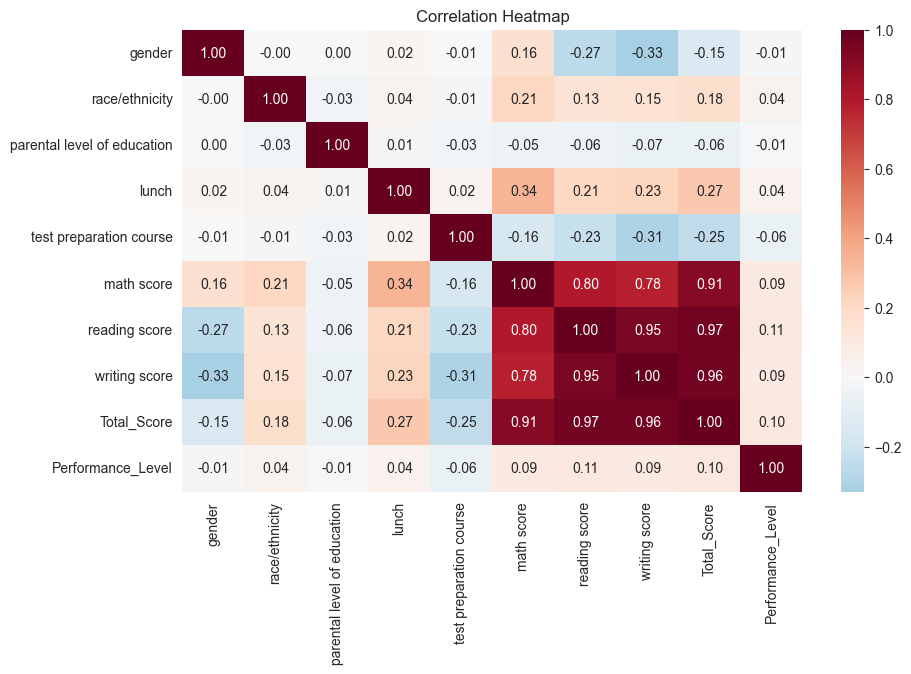

In [26]:
# Encode categorical columns
df_encoded = df.copy()

# Label encode categorical cols
for col in ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course", "Performance_Level"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

corr = df_encoded.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


- **Math, reading, and writing scores** are **strongly positively correlated** with each other and with the total score.  
- **Demographic factors** such as gender, race/ethnicity, parental education, and lunch type show **weak or negligible correlations** with performance.  
- The **test preparation course** shows a **slight negative correlation**, suggesting students who took it may have had weaker starting performance.

---
---

# Conclusion & Suggestions

## Conclusion
- **Math, reading, and writing scores** are highly correlated, and together they determine overall performance.  
- **Females outperform in reading and writing**, while **males perform slightly better in math**.  
- **Socioeconomic factors** such as lunch type and parental education influence performance—students with standard lunch and higher parental education levels tend to achieve higher scores.  
- **Test preparation courses** show a positive effect overall, with students who completed them achieving better results.  
- Demographic factors (gender, race/ethnicity) have only **minor or negligible correlations** with total performance.

## Suggestions
- Encourage **balanced subject support**: focus on improving math for females and literacy skills for males.  
- Provide **additional resources and guidance** for students from disadvantaged backgrounds (e.g., free/reduced lunch).  
- Promote **parental involvement and awareness programs**, especially for families with lower education levels.  
- Increase **access to and engagement in test preparation courses** to raise overall performance.  
- Use these insights to design **data-driven policies and interventions** for better academic outcomes.